In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("DoctorVisits.csv")

In [4]:
data.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [6]:
print(data.isnull().sum())

Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64


In [7]:
data["illness"].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

In [8]:
data["age"].value_counts()

0.22    1213
0.72     822
0.19     752
0.27     523
0.62     316
0.67     315
0.32     301
0.57     273
0.52     222
0.47     181
0.37     146
0.42     126
Name: age, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

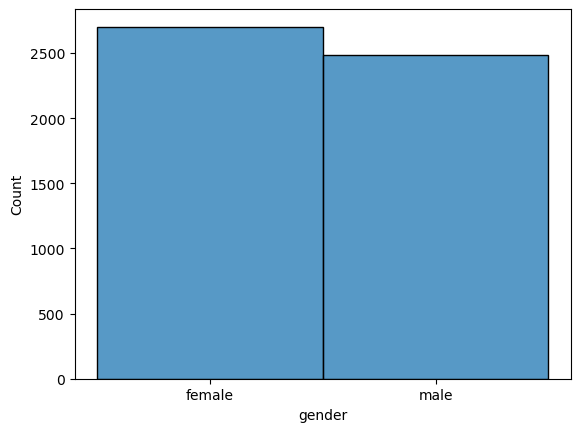

In [9]:
sns.histplot(data.gender,bins=2)

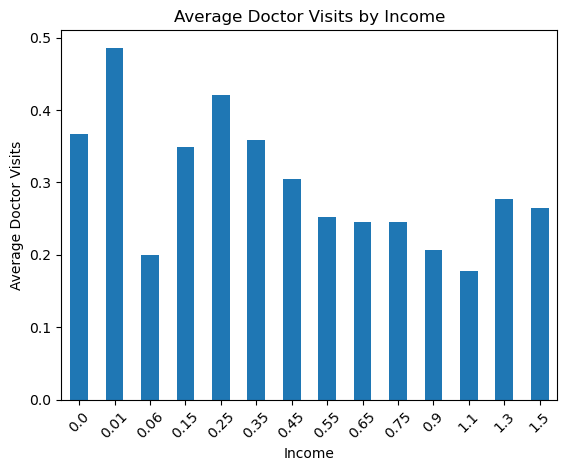

In [28]:
average_visits = data.groupby('income')['visits'].mean()
average_visits.plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Average Doctor Visits')
plt.title('Average Doctor Visits by Income')
plt.xticks(rotation=45)
plt.show()


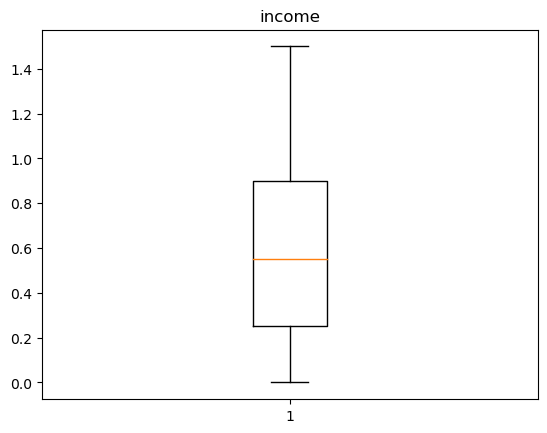

In [29]:
y=list(data.income)
plt.boxplot(y)
plt.title('income')
plt.show()

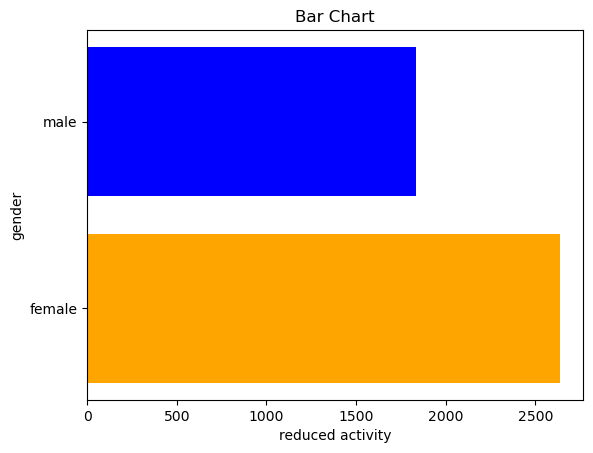

In [12]:
bar=data.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(bar['gender'],bar['reduced'],color=['orange','blue'])
plt.title('Bar Chart')
plt.xlabel("reduced activity")
plt.ylabel("gender")
plt.show()

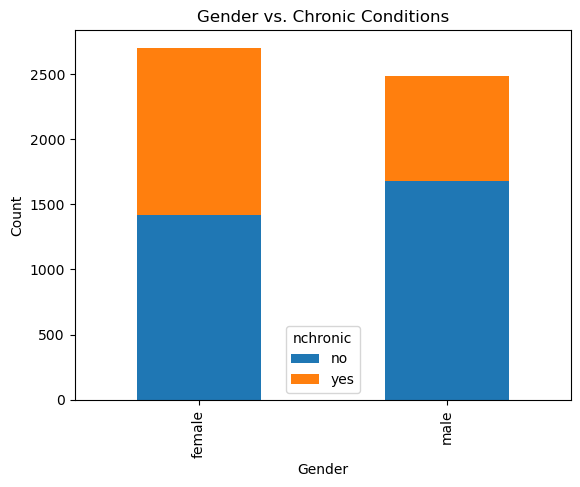

In [21]:
cross_tab = pd.crosstab(data['gender'], data['nchronic'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Chronic Conditions')
plt.show()

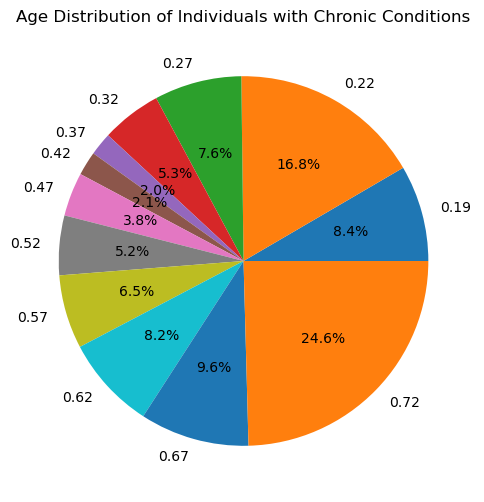

In [24]:
grouped_data = data.groupby(['age', 'nchronic']).size().reset_index(name='count')
chronic_data = grouped_data[grouped_data['nchronic'] == 'yes']
age_counts = chronic_data.groupby('age')['count'].sum()
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution of Individuals with Chronic Conditions')
plt.show()